In [5]:
# !pip install influxdb-client

In [6]:
import influxdb_client
import pandas as pd
import matplotlib.pyplot as plt
import json
from pathlib import Path

In [7]:
config_file = "/windows/os/Thesis-Project/ODAbler/key-configurations/influxdb-config.json"
p = Path(config_file)
with p.open('r') as f:
    content = json.load(f)
    print(content)
url = content['url']
token = content['token']
org = content['org']
client = influxdb_client.InfluxDBClient(
   url=url,
   token=token,
   org=org,
    timeout=30_000
)
query_api = client.query_api()

{'bucket': 'FinalExperiment', 'org': '@Large-Research', 'token': 'd5KtoS1-I2iMVHiRQsVnXKV7MW7QR70Z1mqRdvqs08v-jKxEv8Q_URRHr2tl4AUwwqWHDeZNUKEtSTLjiCf-vg==', 'url': 'http://localhost:8086', 'location': 'Amsterdam'}


In [8]:
query_standard = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-10-24T18:15:00Z, stop: 2023-10-24T19:30:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 154)'
result_standard = query_api.query_data_frame(org=org, query=query_standard)

#display(result_standard.head(10))
pd.set_option('display.max_columns', None)
df_standard = result_standard[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
print(df_standard)

        timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0            30.0       0.0             1.0           24.0       350.0  \
1            30.0       1.0             1.0           24.0       350.0   
2            30.0       2.0             1.0           24.0       350.0   
3            30.0       3.0             1.0           24.0       350.0   
4            30.0       4.0             1.0           24.0       350.0   
...           ...       ...             ...            ...         ...   
214140   125970.0      46.0             0.0            0.0       200.0   
214141   125970.0      47.0             0.0            0.0       200.0   
214142   125970.0      48.0             0.0            0.0       200.0   
214143   125970.0      49.0             0.0            0.0       200.0   
214144   125970.0      50.0             0.0            0.0       200.0   

         energyUsage  
0       1.019993e+04  
1       2.039985e+04  
2       3.059978e+04  
3       4.079971e+0

In [9]:
query_heft = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-10-24T18:15:00Z, stop: 2023-10-24T19:30:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 155)'
result_heft = query_api.query_data_frame(org=org, query=query_heft)

df_heft = result_heft[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
print(df_heft)

        timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0            30.0       0.0             1.0           24.0       350.0  \
1            30.0       1.0             1.0           24.0       350.0   
2            30.0       2.0             1.0           24.0       350.0   
3            30.0       3.0             1.0           24.0       350.0   
4            30.0       4.0             1.0           24.0       350.0   
...           ...       ...             ...            ...         ...   
214141   125970.0      46.0             0.0            0.0       200.0   
214142   125970.0      47.0             0.0            0.0       200.0   
214143   125970.0      48.0             0.0            0.0       200.0   
214144   125970.0      49.0             0.0            0.0       200.0   
214145   125970.0      50.0             0.0            0.0       200.0   

         energyUsage  
0       1.019993e+04  
1       2.039985e+04  
2       3.059978e+04  
3       4.079971e+0

In [10]:
query_random = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-10-24T18:15:00Z, stop: 2023-10-24T19:30:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 156)'
result_random = query_api.query_data_frame(org=org, query=query_random)

df_random = result_random[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
print(df_random)

        timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0            30.0       0.0        1.000000           24.0  350.000000  \
1            30.0       1.0        1.000000           24.0  350.000000   
2            30.0       2.0        1.000000           24.0  350.000000   
3            30.0       3.0        1.000000           24.0  350.000000   
4            30.0       4.0        1.000000           24.0  350.000000   
...           ...       ...             ...            ...         ...   
214141   125970.0      46.0        0.000000            0.0  200.000000   
214142   125970.0      47.0        0.000000            0.0  200.000000   
214143   125970.0      48.0        0.041667            1.0  200.010851   
214144   125970.0      49.0        0.000000            0.0  200.000000   
214145   125970.0      50.0        0.000000            0.0  200.000000   

         energyUsage  
0       1.019993e+04  
1       2.039985e+04  
2       3.059978e+04  
3       4.079971e+0

In [11]:
# query_minmin = 'from(bucket:"Experiment")\
# |> range(start: 2023-10-24T18:15:00Z, stop: 2023-10-24T19:30:00Z)\
# |> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policy_id|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|host_id/)\
# |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
# |> filter(fn:(r) => r.policy_id == 4)'
# result_minmin = query_api.query_data_frame(org=org, query=query_minmin)
# 
# df_minmin = result_minmin[['timestamp','host_id','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
# print(df_minmin)

In [12]:
df_total_power_standard = df_standard[['timestamp','serverId','energyUsage']]
df_total_power_standard['serverId'] = df_total_power_standard['serverId']. astype(int)
df_total_power_standard = df_total_power_standard.loc[df_total_power_standard['serverId'] == 50]
print(df_total_power_standard)

        timestamp  serverId   energyUsage
50           30.0        50  5.201963e+05
101          60.0        50  1.055696e+06
152          90.0        50  1.591196e+06
203         120.0        50  2.126696e+06
254         150.0        50  2.662196e+06
...           ...       ...           ...
213940   125850.0        50  1.291414e+09
213991   125880.0        50  1.291720e+09
214042   125910.0        50  1.292026e+09
214093   125940.0        50  1.292332e+09
214144   125970.0        50  1.292638e+09

[4199 rows x 3 columns]


/tmp/ipykernel_106621/3816998763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_standard['serverId'] = df_total_power_standard['serverId']. astype(int)


In [13]:
df_total_power_heft = df_heft[['timestamp','serverId','energyUsage']]
df_total_power_heft['serverId'] = df_total_power_heft['serverId']. astype(int)
df_total_power_heft = df_total_power_heft.loc[df_total_power_heft['serverId'] == 50]
print(df_total_power_heft)

        timestamp  serverId   energyUsage
50           30.0        50  5.201963e+05
101          60.0        50  1.055696e+06
152          90.0        50  1.591196e+06
203         120.0        50  2.126696e+06
254         150.0        50  2.662196e+06
...           ...       ...           ...
213941   125850.0        50  1.291614e+09
213992   125880.0        50  1.291920e+09
214043   125910.0        50  1.292226e+09
214094   125940.0        50  1.292532e+09
214145   125970.0        50  1.292838e+09

[4199 rows x 3 columns]


/tmp/ipykernel_106621/392513669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_heft['serverId'] = df_total_power_heft['serverId']. astype(int)


In [14]:
df_total_power_random = df_random[['timestamp','serverId','energyUsage']]
df_total_power_random['serverId'] = df_total_power_random['serverId']. astype(int)
df_total_power_random = df_total_power_random.loc[df_total_power_random['serverId'] == 50]
print(df_total_power_random)

        timestamp  serverId   energyUsage
50           30.0        50  5.201963e+05
101          60.0        50  1.055696e+06
152          90.0        50  1.591196e+06
203         120.0        50  2.126696e+06
254         150.0        50  2.662196e+06
...           ...       ...           ...
213941   125850.0        50  1.291170e+09
213992   125880.0        50  1.291476e+09
214043   125910.0        50  1.291782e+09
214094   125940.0        50  1.292088e+09
214145   125970.0        50  1.292394e+09

[4199 rows x 3 columns]


/tmp/ipykernel_106621/550239775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_random['serverId'] = df_total_power_random['serverId']. astype(int)


In [15]:
# df_total_power_minmin = df_minmin[['timestamp','host_id','energyUsage']]
# df_total_power_minmin['host_id'] = df_total_power_minmin['host_id']. astype(int)
# df_total_power_minmin = df_total_power_minmin.loc[df_total_power_minmin['host_id'] == 33]
# print(df_total_power_minmin)

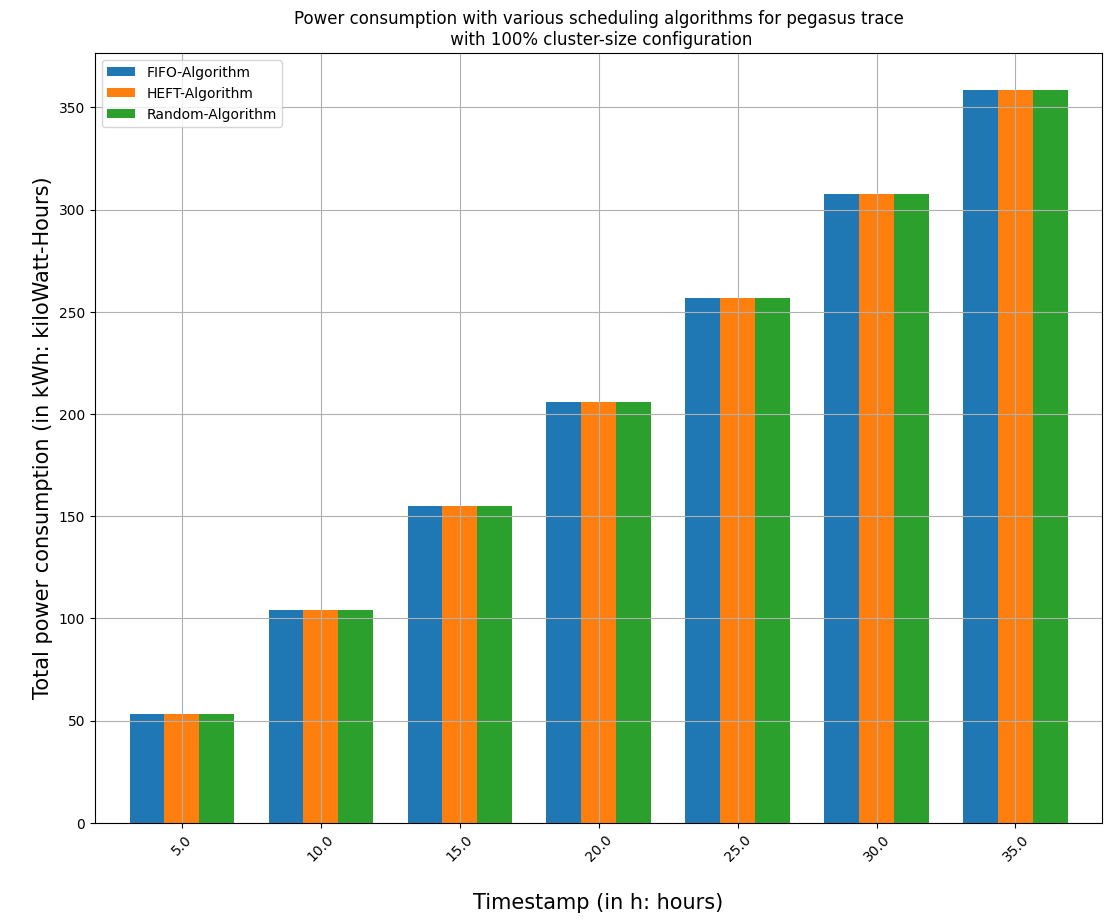

In [16]:
df1 = df_total_power_standard.drop(['serverId'], axis=1)
df2 = df_total_power_heft.drop(['serverId'], axis=1)
df3 = df_total_power_random.drop(['serverId'], axis=1)
# df4 = df_total_power_minmin.drop(['serverId'], axis=1)
# print(df1)
# Create a list of all the dataframes
dfs = [df1, df2, df3]

# Create a new dataframe with all the timestamps from all the dataframes
df_timestamps = pd.DataFrame({'timestamp': sorted(set(sum([df['timestamp'].tolist() for df in dfs], [])))})

# Merge the new dataframe with all the dataframes, filling in missing values with 0
df_merged = df_timestamps.merge(df1, how='left', on='timestamp', suffixes=('', '_x')).merge(df2, how='left', on='timestamp', suffixes=('', '_y')).merge(df3, how='left', on='timestamp', suffixes=('', '_z')).fillna(0)

# Convert watts to kiloWatt-hours
df_merged["energyUsage"] = df_merged["energyUsage"]/(1000*3600)
df_merged["energyUsage_y"] = df_merged["energyUsage_y"]/(1000*3600)
df_merged["energyUsage_z"] = df_merged["energyUsage_z"]/(1000*3600)
# df_merged["energyUsage_w"] = df_merged["energyUsage_w"]/1000000
df_merged.rename(columns={'energyUsage': 'FIFO-Algorithm', 'energyUsage_y': 'HEFT-Algorithm', 'energyUsage_z': 'Random-Algorithm'}, inplace=True) #, 'energyUsage_w': 'MinMin-Algorithm'
df_merged['timestamp'] = df_merged['timestamp'].astype(int)

# Create a custom x-axis with every 599th value, due to very large number of elements in timestamp!
df_custom = df_merged[df_merged.index % 599 == 0]

# drop first column to have consistent distance of plots
df_custom = df_custom.drop(0)
df_custom = df_custom.reset_index(drop= True)
df_custom['timestamp_hours'] = round(df_custom['timestamp'] / 3600, 1) # convert seconds to hours
# print(df_custom)

ax_enlarged = df_custom.plot.bar(x='timestamp_hours', y=['FIFO-Algorithm','HEFT-Algorithm','Random-Algorithm'], title='Power consumption with various scheduling algorithms for pegasus trace\n with 100% cluster-size configuration', width=.75, figsize=(13, 10))
# ax_enlarged.set_xticks(custom_x)
# ax_enlarged.set_xticklabels(custom_x_labels)
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('\nTotal power consumption (in kWh: kiloWatt-Hours)', fontsize=15)
plt.xlabel('\nTimestamp (in h: hours)', fontsize=15)
# plt.figure(figsize=(14.5, 8.5))
# plt.set_size_inches(14.5, 8.5)
plt.grid(True)
plt.savefig('multiple_hosts_energy_plotted_trace_pegasus_150.png', bbox_inches='tight')
plt.show()

In [17]:
# df_merged["energyUsage"] = df_merged["energyUsage"]/(1000*3600)
# df_merged["energyUsage_y"] = df_merged["energyUsage_y"]/(1000*3600)
# df_merged["energyUsage_z"] = df_merged["energyUsage_z"]/(1000*3600)
print(df_merged)

      timestamp  FIFO-Algorithm  HEFT-Algorithm  Random-Algorithm
0            30        0.144499        0.144499          0.144499
1            60        0.293249        0.293249          0.293249
2            90        0.441999        0.441999          0.441999
3           120        0.590749        0.590749          0.590749
4           150        0.739499        0.739499          0.739499
...         ...             ...             ...               ...
4194     125850      358.726179      358.781646        358.658289
4195     125880      358.811179      358.866646        358.743289
4196     125910      358.896179      358.951646        358.828289
4197     125940      358.981180      359.036646        358.913289
4198     125970      359.066180      359.121646        358.998289

[4199 rows x 4 columns]


In [18]:
# Reverse the column and find the first non-zero value for getting total power
last_non_zero_value_standard = df_merged[df_merged['FIFO-Algorithm'] != 0]['FIFO-Algorithm'].iloc[-1]
print(f"Total energy consumption in FIFO algorithm for executing given trace - {last_non_zero_value_standard} kWh")
last_non_zero_value_heft = df_merged[df_merged['HEFT-Algorithm'] != 0]['HEFT-Algorithm'].iloc[-1]
print(f"Total energy consumption in HEFT algorithm for executing given trace - {last_non_zero_value_heft} kWh")
last_non_zero_value_random = df_merged[df_merged['Random-Algorithm'] != 0]['Random-Algorithm'].iloc[-1]
print(f"Total energy consumption in Random algorithm for executing given trace - {last_non_zero_value_random} kWh")

Total energy consumption in FIFO algorithm for executing given trace - 359.0661796595586 kWh
Total energy consumption in HEFT algorithm for executing given trace - 359.12164593596145 kWh
Total energy consumption in Random algorithm for executing given trace - 358.9982891467526 kWh


In [19]:
total_energy_for_all_scheduling_algos = [last_non_zero_value_standard, last_non_zero_value_heft, last_non_zero_value_random]
print(total_energy_for_all_scheduling_algos)

[359.0661796595586, 359.12164593596145, 358.9982891467526]


In [20]:
min_value = min(total_energy_for_all_scheduling_algos)
dict = {0:"FIFO", 1:"HEFT", 2:"Random"}
min_index = total_energy_for_all_scheduling_algos.index(min_value)

# Calculate the percentage difference for each element compared to the minimum
percentages = []
for i, value in enumerate(total_energy_for_all_scheduling_algos):
    if i == min_index:
        continue  # Skip comparing the minimum value to itself
    percentage_difference = ((value - min_value) / min_value) * 100
    percentages.append((i, percentage_difference))

# Print the results
print(f"Resource scheduling algorithm {dict[min_index]} is the most optimal amongst the three scheduling algorithms analysed above!")
print("----------------------------------------------------------------------------------------------------------------------------------------------")
for i, percentage in percentages:
    print(f"Scheduling algorithm {dict[i]} records {abs(percentage):.5f}% {'better' if percentage < 0 else 'worse'} energy-efficiency than the scheduling algorithm {dict[min_index]} for pegasus workload trace and 150% cluster-size configuration.")


Resource scheduling algorithm Random is the most optimal amongst the three scheduling algorithms analysed above!
----------------------------------------------------------------------------------------------------------------------------------------------
Scheduling algorithm FIFO records 0.01891% worse energy-efficiency than the scheduling algorithm Random for pegasus workload trace and 150% cluster-size configuration.
Scheduling algorithm HEFT records 0.03436% worse energy-efficiency than the scheduling algorithm Random for pegasus workload trace and 150% cluster-size configuration.
